# Soru 1:
First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

1. Interpret the data by making univariate analysis and indicate the points you consider important.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore 
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")

In [ ]:
perf=pd.read_csv("StudentsPerformance.csv")
perf.head()
perf.info()
perf.isna().sum()

# veri temizliğinde missing value'ların olup olmadığına bakmak için .info() ile kontrol edilir.
# Veri seti 8 sütun 1000 satırdan oluşmaktadır ve her sütun da 1000 satır içermektedir. null değer yoktur.

In [ ]:
# Tek değişkenli analizde ilk yapılması gereken .describe() ile verilerin istatistiki bilgilerini incelemektir.
print(perf.describe(include='all'))

# Outliers değerlerin olup olmadığını öncelikle görselleştirme ile inceleyelim.
plt.figure(figsize=(14,6),dpi=100)
plt.subplot(1,3,1)
plt.title("Math Score")
plt.boxplot(perf["math score"])

plt.subplot(1,3,2)
plt.title("Reading Score")
plt.boxplot(perf["reading score"])

plt.subplot(1,3,3)
plt.title("Writing Score")
plt.boxplot(perf["writing score"])

# Boxplot grafiğinden outliers değerlerin olduğu görülmektedir.
plt.show()

# Sayısal değişkenlere göre kaçar tane outliersın olduğunu öğrenmek için for döngüsü yazalım:
zscores=zscore(perf["math score"])
for i in range(1,5):
    print("Math score Threshold:",i)
    print(len((np.where(zscores>i)[0])))
# Threshold değeri 3 olduğunda math,reading,writing score outliers değerleri sıfırlanmaktadır.


# Aykırı değerleri sınırlandırmak/etkisini azaltmak için winsorize, log yöntemlerini kullanalım:
plt.figure(figsize=(11,9),dpi=100)
plt.subplot(2,3,1)
plt.title("Winsorize Math Score")
plt.hist(winsorize(perf["math score"], (0,0.10)))

plt.subplot(2,3,2)
plt.title("Winsorize Reading Score")
plt.hist(winsorize(perf["reading score"], (0,0.10)))

plt.subplot(2,3,3)
plt.title("Winsorize Writing Score")
plt.hist(winsorize(perf["writing score"], (0,0.10)))

plt.subplot(2,3,4)
plt.title("Logaritmic Math Score")
plt.hist(np.log(perf["math score"]+1), color="g")

plt.subplot(2,3,5)
plt.title("Logaritmic Reading Score")
plt.hist(np.log(perf["reading score"]), color="g")

plt.subplot(2,3,6)
plt.title("Logaritmic Writing Score")
plt.hist(np.log(perf["writing score"]), color="g")

plt.show()

# TEK DEĞİŞKENLİ ANALİZDE SÜREKLİ DEĞİŞKENLER GÖRSELLEŞTİRİLEREK LOGARİTMASI ALINAN DEĞİŞKENLERİN 
# NORMAL DAĞILIMA DAHA ÇOK YAKLAŞTIĞI BULUNMUŞTUR

# Soru 2:
Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

In [ ]:
df=pd.read_csv("states_all.csv", index_col=0)
df.head()

# veri setinde kayıp değerler olduğu için öncelikle her değişken için medyanını fillna ile doldurdum.
# Ardından yıl değişkeni sıralı olmadığı için plot grafiğinin düzgün çıkması için sıraladım.
df.fillna(df.groupby("STATE").transform("median"), inplace=True)
df_california=df[df["STATE"]=="CALIFORNIA"].sort_values("YEAR").reset_index()


plt.figure(figsize=(6,4), dpi=100)
plt.title("Plot of California ")
plt.xlabel("YEARS")
plt.ylabel("Revenue & Expenditure")
plt.plot(df_california["YEAR"],df_california["TOTAL_REVENUE"], label="Revenue")
plt.plot(df_california["YEAR"],df_california["TOTAL_EXPENDITURE"], label="Expenditure")
plt.legend()

plt.show()


# Plot grafiğini yorumlarsak; yıllara göre gelir ve harcamalar birlikte artıp azalmaktadır.En yüksek
# harcama 2015-2017 yılları arasında olmakla birlikte en düşük gelir ve harcama ise 1993-1995 arasında

# Soru 3:
In which course are students more successful in your chosen state? Mathematics or reading?

In [ ]:
df=pd.read_csv("states_all.csv", index_col=0).reset_index()

df_california=df[df["STATE"]=="CALIFORNIA"].sort_values("YEAR").reset_index()
df_california.head(10)


# Bir ülkedeki hangi kursun öğrencilerinin daha başarılı olduğunu bulmak için öncelikle missing value lar doldurulmalı ardından
# grafik çizdirilerek farkı gözlemlenmeli

df_california["AVG_MATH_4_SCORE"].fillna(df_california["AVG_MATH_4_SCORE"].mean(),inplace=True)
df_california["AVG_MATH_8_SCORE"].fillna(df_california["AVG_MATH_8_SCORE"].mean(),inplace=True)
df_california["AVG_READING_4_SCORE"].fillna(df_california["AVG_READING_4_SCORE"].mean(),inplace=True)
df_california["AVG_READING_8_SCORE"].fillna(df_california["AVG_READING_8_SCORE"].mean(),inplace=True)

df_california.head()

plt.figure(figsize=(7,4), dpi=100)

plt.subplot(1,2,1)
plt.xlabel("Avg Math Score")
plt.hist(winsorize(df_california["AVG_MATH_4_SCORE"], (0,0.10)), color="pink")

plt.subplot(1,2,2)
plt.xlabel("Avg Reading Score")
plt.hist(winsorize(df_california["AVG_READING_4_SCORE"], (0,0.10)), color="yellow")

plt.show()

# Matematik skorun başarısının reading den fazla olduğu görülmüştür.

# Soru 4:
What is the distribution of mathematics and reading grades?

Matematik kursunun dağılımı sola çarpıktır.

# Soru 5:
You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

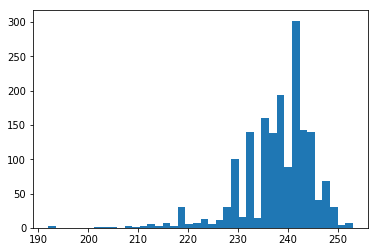

In [17]:
df=pd.read_csv("states_all.csv", index_col=0).reset_index()

sort_states=df.sort_values("YEAR")


sort_states.fillna(sort_states.groupby("STATE").transform('median'),inplace=True)
x=sort_states
plt.hist(x["AVG_MATH_4_SCORE"], bins=40)

plt.show()


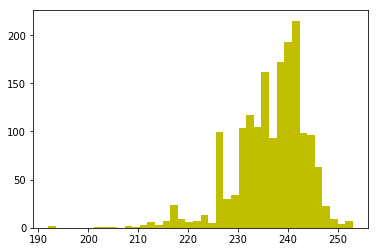

In [14]:
df=pd.read_csv("states_all.csv", index_col=0).reset_index()

sort_states=df.sort_values("YEAR")
sort_states.fillna(sort_states.groupby("STATE").transform('mean'), inplace=True)

plt.hist(sort_states["AVG_MATH_4_SCORE"],bins=40, color="y");

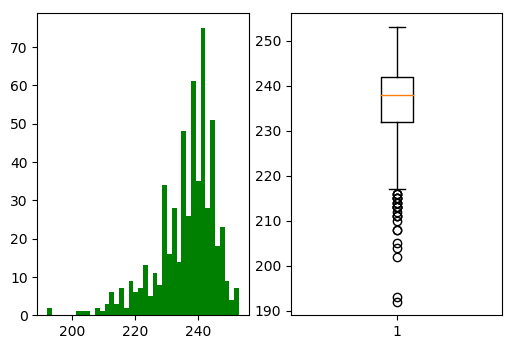

In [20]:
df=pd.read_csv("states_all.csv", index_col=0).reset_index()

sort_states=df.sort_values("YEAR")

sort_states.interpolate(method='linear', limit_direction='forward', axis=0).head()

plt.figure(figsize=(6,4),dpi=100)

plt.subplot(1,2,1)
plt.hist(sort_states["AVG_MATH_4_SCORE"], bins=40, color="g")

plt.subplot(1,2,2)
plt.boxplot(sort_states["AVG_MATH_4_SCORE"].dropna());